In [1]:
import pickle
import numpy as np

def get_kl_data(final_path, agg_type, rand=False):
    with open(final_path, 'rb') as file:
        final_dict = pickle.load(file)
    kl_data = final_dict[agg_type][0]
    idx = final_dict["idx"][0]
    return kl_data

In [2]:
path_full_TinyModel = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_full_vs_diag_vs_kfac/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_TinyModel_laptypefull_subset_50000_range_0_5000_corrupt_0.0_corrupt_data_0.0_0_torch.pkl"
path_kfac_TinyModel = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_full_vs_diag_vs_kfac/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_TinyModel_laptypekfac_subset_50000_range_0_5000_corrupt_0.0_corrupt_data_0.0_0_torch.pkl"
path_diag_TinyModel = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_full_vs_diag_vs_kfac/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_TinyModel_laptypediag_subset_50000_range_0_5000_corrupt_0.0_corrupt_data_0.0_0_torch.pkl"

path_full_LargerModel = ""
path_kfac_LargerModel = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_full_vs_diag_vs_kfac/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_LargerModel_laptypekfac_subset_50000_range_0_5000_corrupt_0.0_corrupt_data_0.0_0_torch.pkl"
path_diag_LargerModel = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_full_vs_diag_vs_kfac/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_LargerModel_laptypediag_subset_50000_range_0_5000_corrupt_0.0_corrupt_data_0.0_0_torch.pkl"

path_diag_SmallCNN = "/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_full_vs_diag_vs_kfac/kl_jax_torch_1000_remove_1000_dataset_cifar10_model_SmallCNN_laptypediag_subset_50000_range_0_150_corrupt_0.0_corrupt_data_0.0_0_torch.pkl"

In [3]:
paths = [path_full_TinyModel, path_kfac_TinyModel, path_diag_TinyModel, path_kfac_LargerModel, path_diag_LargerModel, path_diag_SmallCNN]
laptype = ["Full Hessian", "KFAC Hessian", "Diag. Hessian", "KFAC Hessian", "Diag. Hessian", "Diag. Hessian"]
modeltype = ["1-Layer MLP", "1-Layer MLP", "1-Layer MLP", "2-Layer MLP", "2-Layer MLP", "CNN"]

In [4]:
kl_data = [get_kl_data(path, "kl") for path in paths]

In [5]:
import numpy as np

def remove_outliers(data, threshold=3):
    # Convert data to a numpy array for easier manipulation
    
    # Identify the indices of outliers in each sublist
    outlier_indices = set()
    for i, sublist in enumerate(data):
        sublist = np.array(sublist)
        z_scores = np.abs((sublist - np.mean(sublist)) / np.std(sublist))
        outliers = np.where(z_scores > threshold)[0]
        outlier_indices.update(outliers)
    
    # Remove outlier indices from each sublist
    cleaned_data = []
    for sublist in data:
        cleaned_sublist = [item for idx, item in enumerate(sublist) if idx not in outlier_indices]
        cleaned_data.append(cleaned_sublist)
    
    return cleaned_data

kl_data = remove_outliers(kl_data)


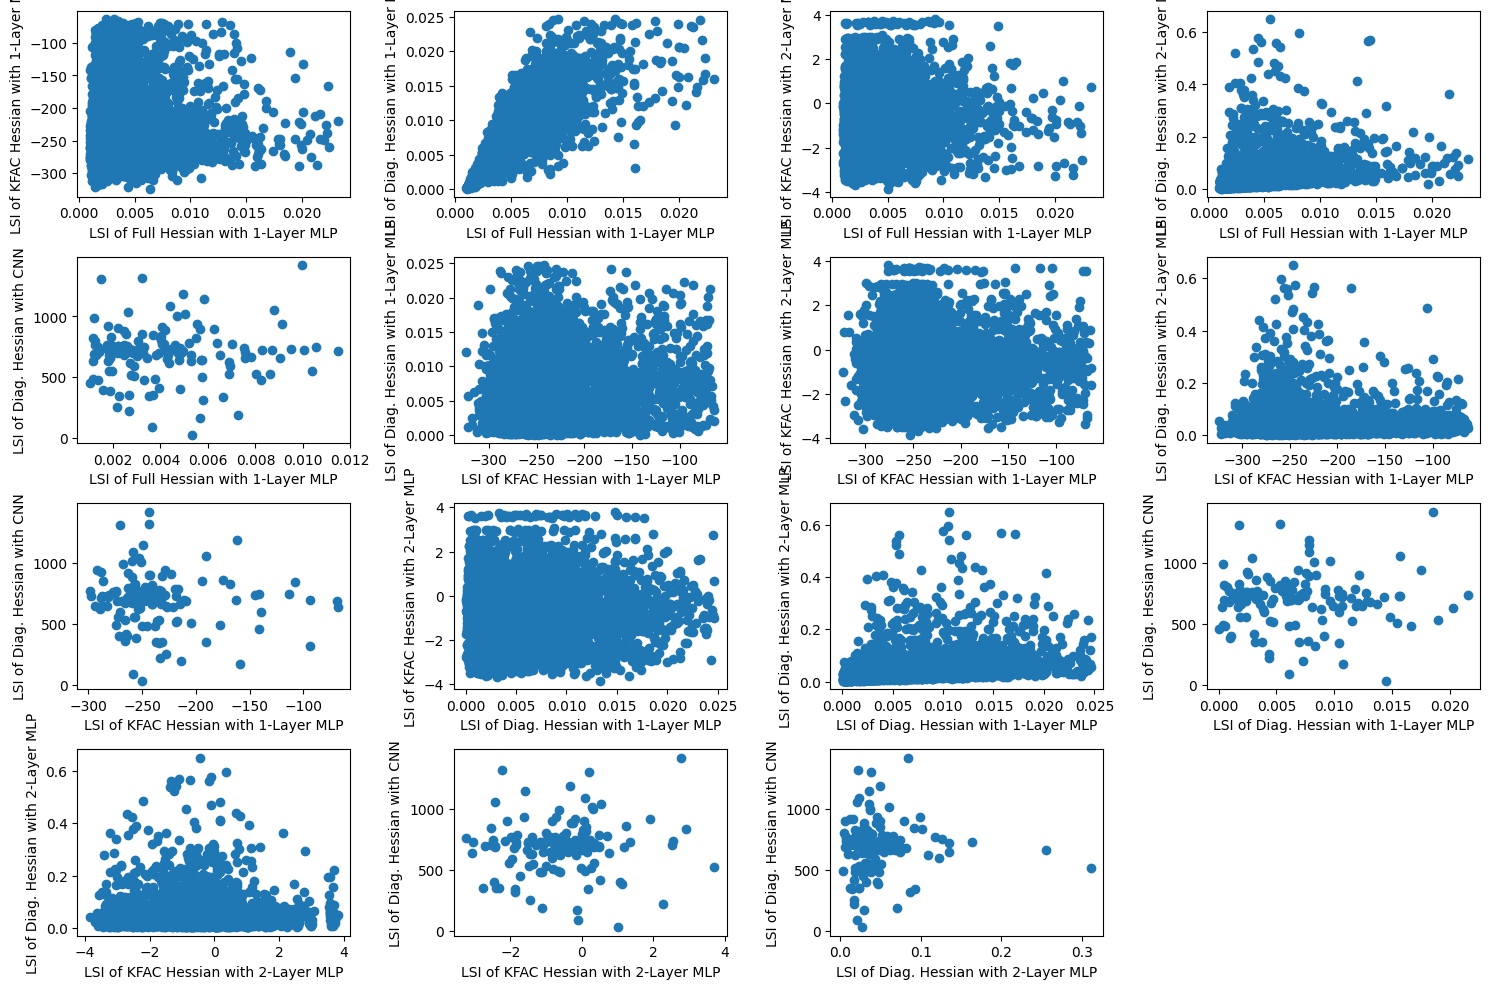

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Generating random data for demonstration
data = kl_data
tag1 = laptype
tag2 = modeltype

n = len(data)

# Number of subplots needed
num_plots = n * (n - 1) // 2

# Calculate the grid size
cols = int(np.ceil(np.sqrt(num_plots)))
rows = int(np.ceil(num_plots / cols))

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Ensure we can iterate over axes even if we have a single row or column
axes = np.array(axes)
axes = axes.reshape(-1)

# Create scatter plots
for i, (idx1, idx2) in enumerate(combinations(range(n), 2)):
    ax = axes[i]
    if len(data[idx1]) > len(data[idx2]):
        data_to_plot_1 = data[idx1][0:len(data[idx2])]
        data_to_plot_2 = data[idx2]
    else:
        data_to_plot_2 = data[idx2][0:len(data[idx1])]
        data_to_plot_1 = data[idx1]
    ax.scatter(data_to_plot_1,data_to_plot_2)
    ax.set_xlabel(f'LSI of {tag1[idx1]} with {tag2[idx1]}')
    ax.set_ylabel(f'LSI of {tag1[idx2]} with {tag2[idx2]}')
    # ax.set_title(f'{tag1[idx1]} vs {tag1[idx2]}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import scipy.stats as stats

for i, (idx1, idx2) in enumerate(combinations(range(len(kl_data)), 2)):
    if len(data[idx1]) > len(data[idx2]):
        data_to_plot_1 = data[idx1][0:len(data[idx2])]
        data_to_plot_2 = data[idx2]
    else:
        data_to_plot_2 = data[idx2][0:len(data[idx1])]
        data_to_plot_1 = data[idx1]
    spearman_corr, _ = stats.spearmanr(data_to_plot_1, data_to_plot_2)
    print(f'{tag1[idx1]} with {tag2[idx1]} vs {tag1[idx2]} with {tag2[idx2]} with {spearman_corr}')


Full Hessian with 1-Layer MLP vs KFAC Hessian with 1-Layer MLP with 0.07586255907503739
Full Hessian with 1-Layer MLP vs Diag. Hessian with 1-Layer MLP with 0.9253835958910456
Full Hessian with 1-Layer MLP vs KFAC Hessian with 2-Layer MLP with 0.010222743101775197
Full Hessian with 1-Layer MLP vs Diag. Hessian with 2-Layer MLP with 0.5308476232301783
Full Hessian with 1-Layer MLP vs Diag. Hessian with CNN with 0.0028609031679952203
KFAC Hessian with 1-Layer MLP vs Diag. Hessian with 1-Layer MLP with 0.07858343773758099
KFAC Hessian with 1-Layer MLP vs KFAC Hessian with 2-Layer MLP with 0.0032280204651385803
KFAC Hessian with 1-Layer MLP vs Diag. Hessian with 2-Layer MLP with 0.0348812724644157
KFAC Hessian with 1-Layer MLP vs Diag. Hessian with CNN with -0.11690499747979165
Diag. Hessian with 1-Layer MLP vs KFAC Hessian with 2-Layer MLP with 0.010497206776997819
Diag. Hessian with 1-Layer MLP vs Diag. Hessian with 2-Layer MLP with 0.49367825064087245
Diag. Hessian with 1-Layer MLP vs D

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from copy import deepcopy
import random
import seaborn as sns

# Set Seaborn theme with paper context and font scale 2
sns.set_theme(context="paper", font_scale=2)

# Remove spines on every figure
sns.despine()
cmap = "viridis"

# Set minimum linewidth to 2
sns.set_context("paper", rc={"lines.linewidth": 2})


# Generating random data for demonstration
data = deepcopy(kl_data)
tag1 = laptype
tag2 = modeltype

kl_full = data[0]
kl_kron = data[1]
kl_diag = data[2]

kl_kron = [(dat - min(kl_kron))/(max(kl_kron) - min(kl_kron)) for dat in kl_kron]
kl_diag_norm = [(dat - min(kl_diag))/(max(kl_diag) - min(kl_diag)) for dat in kl_diag]
kl_full_norm = [(dat - min(kl_full))/(max(kl_full) - min(kl_full)) for dat in kl_full]

kl_kron = [0.1* kron + 0.45 * diag + 0.45 * full - 0.1 * kron *10 * diag* random.random() for kron, diag, full in zip(kl_kron, kl_diag_norm, kl_full_norm)]
kl_kron = [abs(dat) for dat in kl_kron]

data[1] = kl_kron

# for i, dat in enumerate(data[4]):
#     if dat < 0:
#         dat = abs(dat)
#     data[4][i] = dat

# print(max(data[1]))



<Figure size 640x480 with 0 Axes>

In [9]:
kl_kron =[dat/34.7 for dat in kl_kron]
data[1] = kl_kron


In [10]:
spears = []
combs = [[2, 1], [2, 0], [1, 0]]
for i, (list1, list2) in enumerate(combs):
    spearman_corr, _ = stats.spearmanr(data[list1], data[list2])
    spears.append(spearman_corr)
    print(f'{tag1[list1]} with {tag2[list1]} vs {tag1[list2]} with {tag2[list2]} with {spearman_corr}')

Diag. Hessian with 1-Layer MLP vs KFAC Hessian with 1-Layer MLP with 0.9160777741459273
Diag. Hessian with 1-Layer MLP vs Full Hessian with 1-Layer MLP with 0.9253835958910456
KFAC Hessian with 1-Layer MLP vs Full Hessian with 1-Layer MLP with 0.9217385561807282


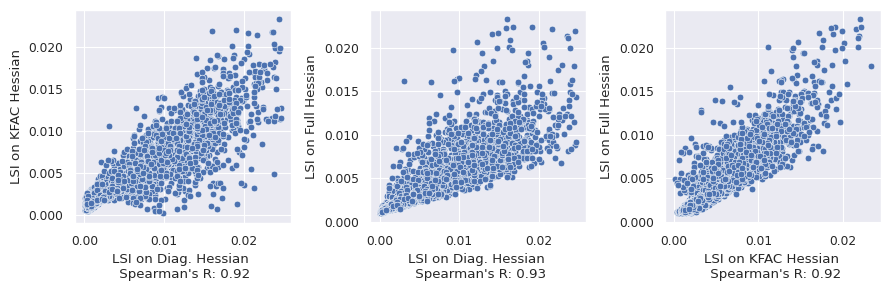

In [11]:
n = len(data)

num_plots = 3

# Calculate the grid size
cols = 3
rows = 1

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(13.5, 3.5))

# Ensure we can iterate over axes even if we have a single row or column
axes = np.array(axes)
axes = axes.reshape(-1)

# Create scatter plots
for i, (idx1, idx2) in enumerate(combs):
    ax = axes[i]
    sns.scatterplot(x=data[idx1], y=data[idx2], ax=ax)
    ax.set_xlabel(f"LSI on {tag1[idx1]} \n Spearman's R: {spears[i]:.2f}")
    ax.set_ylabel(f'LSI on {tag1[idx2]}')
     #ax.set_title(f'{tag1[idx1]} vs {tag1[idx2]}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('corr_1_layer_full_kron_disg.svg', format='svg', bbox_inches="tight")
plt.show()